#ResNet-50 Model

##What Is the ResNet-50 Model?

ResNet stands for Residual Network and is a specific type of convolutional neural network (CNN) introduced in the 2015 paper “Deep Residual Learning for Image Recognition” by He Kaiming, Zhang Xiangyu, Ren Shaoqing, and Sun Jian. CNNs are commonly used to power computer vision applications.

ResNet-50 is a 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer). Residual neural networks are a type of artificial neural network (ANN) that forms networks by stacking residual blocks.

##ResNet-50 Architecture



The original ResNet architecture was ResNet-34, which comprised 34 weighted layers. It provided a novel way to add more convolutional layers to a CNN, without running into the vanishing gradient problem, using the concept of shortcut connections. A shortcut connection “skips over” some layers, converting a regular network to a residual network.

The regular network was based on the VGG neural networks (VGG-16 and VGG-19)—each convolutional network had a 3×3 filter. However, a ResNet has fewer filters and is less complex than a VGGNet. A 34-layer ResNet can achieve a performance of 3.6 billion FLOPs, and a smaller 18-layer ResNet can achieve 1.8 billion FLOPs, which is significantly faster than a VGG-19 Network with 19.6 billion FLOPs (read more in the ResNet paper, He et, al, 2015).

The ResNet architecture follows two basic design rules. First, the number of filters in each layer is the same depending on the size of the output feature map. Second, if the feature map’s size is halved, it has double the number of filters to maintain the time complexity of each layer.

<img src="https://datagen.tech/wp-content/uploads/2022/08/image1-1-414x1024.png" width=400 height=600>

##Special characteristics of ResNet-50

ResNet-50 has an architecture based on the model depicted above, but with one important difference. The 50-layer ResNet uses a bottleneck design for the building block. A bottleneck residual block uses 1×1 convolutions, known as a “bottleneck”, which reduces the number of parameters and matrix multiplications. This enables much faster training of each layer. It uses a stack of three layers rather than two layers.

The 50-layer ResNet architecture includes the following elements, as shown in the table below:

- A 7×7 kernel convolution alongside 64 other kernels with a 2-sized stride.
- A max pooling layer with a 2-sized stride.
- 9 more layers—3×3,64 kernel convolution, another with 1×1,64 kernels, and a third with 1×1,256 kernels. These 3 layers are repeated 3 times.
- 12 more layers with 1×1,128 kernels, 3×3,128 kernels, and 1×1,512 kernels, iterated 4 times.
- 18 more layers with 1×1,256 cores, and 2 cores 3×3,256 and 1×1,1024, iterated 6 times.
- 9 more layers with 1×1,512 cores, 3×3,512 cores, and 1×1,2048 cores iterated 3 times.
(up to this point the network has 50 layers)

Average pooling, followed by a fully connected layer with 1000 nodes, using the softmax activation function.

<img src="https://datagen.tech/wp-content/uploads/2022/08/image2-2-1024x446.png" width=400 height=200>


#ResNet-50 Transfer Learning with Keras



https://keras.io/api/applications/resnet/#resnet50-function

- Before Augmentation
- After Undersampling
- After Oversampling
- Comparison

## Befor Undersameling

###Import the required libraries and dataset

In [ ]:
import matplotlib.pyplot as plotter_lib

import numpy as np

import PIL as image_lib

import tensorflow as tflow

from tensorflow.keras.layers import Flatten

from keras.layers.core import Dense

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

###Import Dataset

In [ ]:
import pathlib

directory = "/kaggle/input/maizdataset/maizdataset"

data_directory = pathlib.Path(directory)

In [ ]:
for subdirectory in data_directory.iterdir():
    if subdirectory.is_dir():
        folder_name = subdirectory.name
        image_count = len(list(subdirectory.glob("*.jpg"))) + len(list(subdirectory.glob("*.png")))
        print(f"Folder '{folder_name}' contains {image_count} images.")

Folder 'MLN_1_and_MLN_2' contains 3980 images.
Folder 'HEATHLY' contains 5117 images.
Folder 'MSV_2' contains 3095 images.
Folder 'MSV_1' contains 3157 images.


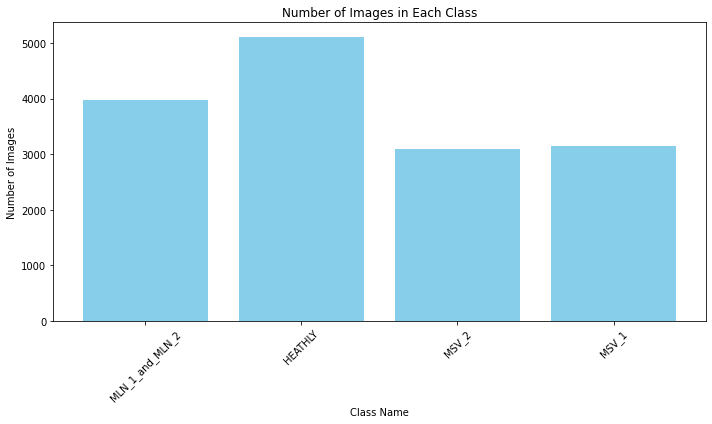

In [ ]:
import matplotlib.pyplot as plt

class_names = []
image_counts = []

for subdirectory in data_directory.iterdir():
    if subdirectory.is_dir():
        folder_name = subdirectory.name
        class_names.append(folder_name)
        image_count = len(list(subdirectory.glob("*.jpg"))) + len(list(subdirectory.glob("*.png")))
        image_counts.append(image_count)

plt.figure(figsize=(10, 6))
plt.bar(class_names, image_counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

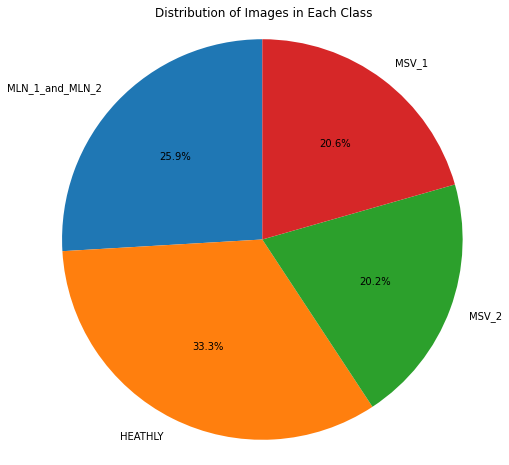

In [ ]:
import matplotlib.pyplot as plt

class_names = []
image_counts = []

for subdirectory in data_directory.iterdir():
    if subdirectory.is_dir():
        folder_name = subdirectory.name
        class_names.append(folder_name)
        image_count = len(list(subdirectory.glob("*.jpg"))) + len(list(subdirectory.glob("*.png")))
        image_counts.append(image_count)

plt.figure(figsize=(8, 8))
plt.pie(image_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Images in Each Class')
plt.axis('equal')
plt.show()


###Partition and Visualize Data

The dataset needs to be split into two parts: one for training and one for validation. As each epoch passes, the model gets trained on the training subset. Then, it assesses its performance and accuracy on the validation subset simultaneously.

In [ ]:
img_height,img_width=224,224

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 15349 files belonging to 4 classes.
Using 12280 files for training.


The above commands specify the images to have a 180×180 size. The validation_split parameter specifies 20% of the dataset for validation and the remaining for training. Users can tweak the batch_size parameter to suit the memory specifications of the machine.

In [ ]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 15349 files belonging to 4 classes.
Using 3069 files for validation.


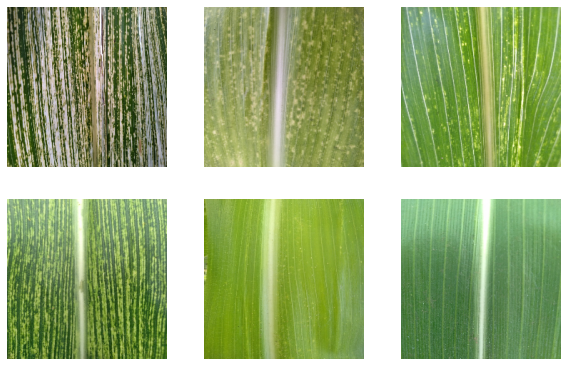

In [ ]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

for images, labels in train_ds.take(1):

  for var in range(6):

    ax = plt.subplot(3, 3, var + 1)

    plotter_lib.imshow(images[var].numpy().astype("uint8"))

    plotter_lib.axis("off")

###Import the Pre-trained Model

The keras library comes with many cutting-edge machine learning algorithms that users can choose to solve a problem. Here I selects the ResNet-50 model to use transfer learning and create a classifier.

In [ ]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(224,224,3),

                   pooling='avg',classes=4,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

94773248/94765736 [==============================] - 1s 0us/step


Setting include_top to False means it will allow adding input and output layers custom to a problem. The weights parameter specifies that the model uses its weights while training on the imagenet dataset. The for loop on the model’s layers ensures it doesn’t learn its weights again and saves on time and space.

to add a fully connected output layer to the model where the learning can happen

In [ ]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))

demo_resnet_model.add(Dense(4, activation='softmax'))

###Train and Evaluate Model

In [ ]:
demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
384/384 [==============================] - 196s 491ms/step - loss: 0.4646 - accuracy: 0.8273 - val_loss: 0.2201 - val_accuracy: 0.9110
Epoch 2/10
384/384 [==============================] - 110s 284ms/step - loss: 0.2482 - accuracy: 0.9009 - val_loss: 0.2270 - val_accuracy: 0.9120
Epoch 3/10
384/384 [==============================] - 109s 281ms/step - loss: 0.2166 - accuracy: 0.9108 - val_loss: 0.2322 - val_accuracy: 0.8970
Epoch 4/10
384/384 [==============================] - 110s 283ms/step - loss: 0.2054 - accuracy: 0.9148 - val_loss: 0.2033 - val_accuracy: 0.9163
Epoch 5/10
384/384 [==============================] - 111s 285ms/step - loss: 0.1861 - accuracy: 0.9225 - val_loss: 0.2304 - val_accuracy: 0.9078
Epoch 6/10
384/384 [==============================] - 109s 280ms/step - loss: 0.1627 - accuracy: 0.9297 - val_loss: 0.2357 - val_accuracy: 0.9045
Epoch 7/10
384/384 [==============================] - 109s 281ms/step - loss: 0.1679 - accuracy: 0.9275 - val_loss: 0.2659 -

###Evaluate the ResNet-50 model

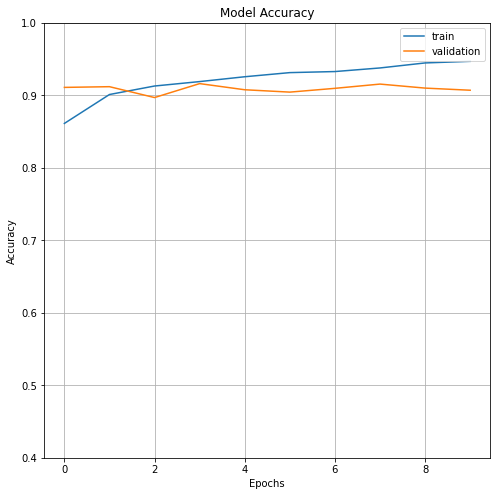

<Figure size 432x288 with 0 Axes>

In [ ]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

plotter_lib.show()

plotter_lib.savefig('output-plot.png')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for x, y in validation_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(demo_resnet_model.predict(x), axis=1))

target_names = ['HEATHLY','MLN_1_and_MLN_2','MSV_2','MSV_1']

print(classification_report(y_true, y_pred, target_names=target_names))


                 precision    recall  f1-score   support

        HEATHLY       0.99      0.99      0.99      1047
MLN_1_and_MLN_2       0.98      0.96      0.97       786
          MSV_2       0.73      0.93      0.82       639
          MSV_1       0.90      0.67      0.77       597

       accuracy                           0.91      3069
      macro avg       0.90      0.89      0.89      3069
   weighted avg       0.92      0.91      0.91      3069



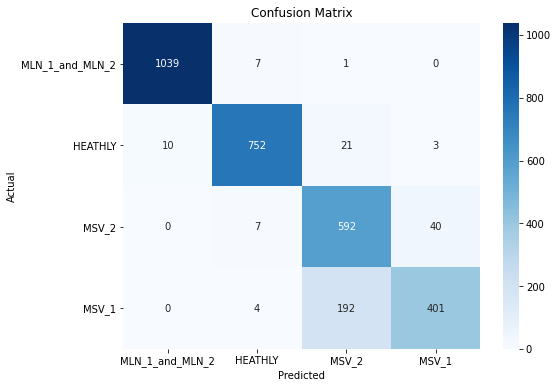

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

for x, y in validation_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(demo_resnet_model.predict(x), axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/kaggle/input/maizdataset/maizdataset/HEATHLY/Image_1.jpg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = demo_resnet_model.predict(img_array)
predicted_class = np.argmax(predictions[0])

if predicted_class==0:
    print("The model predicted that this image belogs to Healthy calass")
elif predicted_class==1:
    print("The model predicted that this image belogs to MLN_1_and_MLN_2 calass")

elif predicted_class==2:
    print("The model predicted that this image belogs to MSV_1 calass")

elif predicted_class==0:
    print("The model predicted that this image belogs to MSV_2 calass")



The model predicted that this image belogs to Healthy calass


##After Undersampling

In [ ]:
# import os
# import shutil
# import random
# import pathlib
# import tensorflow as tf

# # Check if GPU is available
# print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

# # Set the directory where the dataset is located
# directory = "/content/drive/MyDrive/thesis/maizdataset"
# data_directory = pathlib.Path(directory)

# # Define the undersampled directory
# undersampled_dir = "/content/drive/MyDrive/thesis/maizdataset_augmented"
# os.makedirs(undersampled_dir, exist_ok=True)

# # Define class names
# class_names = ['MSV_2', 'MSV_1', 'MLN_1_and_MLN_2', 'HEALTHY']

# # Undersample each class and save the images in the undersampled folder
# for class_name in class_names:
#     class_dir = data_directory / class_name
#     undersampled_class_dir = os.path.join(undersampled_dir, class_name)
#     os.makedirs(undersampled_class_dir, exist_ok=True)

#     # Count the number of images in the class
#     class_images = os.listdir(class_dir)
#     num_images = len(class_images)

#     # Define the target number of images after undersampling
#     target_num_images = min([len(os.listdir(data_directory / c)) for c in class_names])

#     # Undersample the class
#     undersampled_class_images = random.sample(class_images, target_num_images)

#     # Copy the undersampled images to the undersampled directory
#     for img_name in undersampled_class_images:
#         src = os.path.join(class_dir, img_name)
#         dst = os.path.join(undersampled_class_dir, img_name)
#         shutil.copyfile(src, dst)

# print("Undersampling completed.")


###Import the required libraries

###Import Dataset

In [ ]:
import pathlib

directory = "/kaggle/input/data-after-au/maizdataset_augmented"

data_directory = pathlib.Path(directory)



In [ ]:
for subdirectory in data_directory.iterdir():
    if subdirectory.is_dir():
        folder_name = subdirectory.name
        image_count = len(list(subdirectory.glob("*.jpg"))) + len(list(subdirectory.glob("*.png")))
        print(f"Folder '{folder_name}' contains {image_count} images.")

Folder 'MLN_1_and_MLN_2' contains 3095 images.
Folder 'HEATHLY' contains 3095 images.
Folder 'MSV_2' contains 3095 images.
Folder 'MSV_1' contains 3095 images.


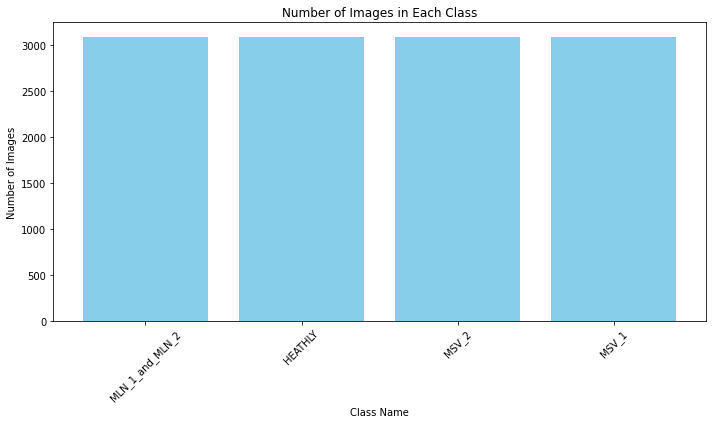

In [ ]:
import matplotlib.pyplot as plt

class_names = []
image_counts = []

for subdirectory in data_directory.iterdir():
    if subdirectory.is_dir():
        folder_name = subdirectory.name
        class_names.append(folder_name)
        image_count = len(list(subdirectory.glob("*.jpg"))) + len(list(subdirectory.glob("*.png")))
        image_counts.append(image_count)

plt.figure(figsize=(10, 6))
plt.bar(class_names, image_counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

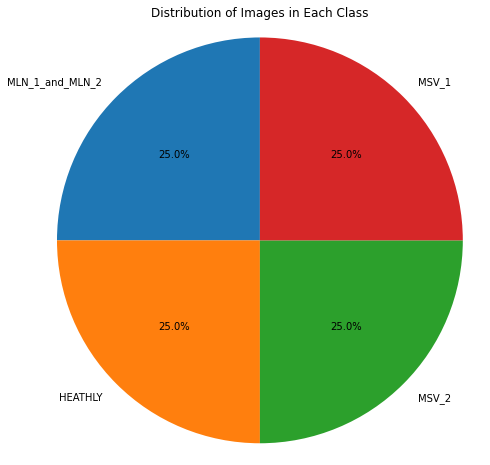

In [ ]:
import matplotlib.pyplot as plt

class_names = []
image_counts = []

for subdirectory in data_directory.iterdir():
    if subdirectory.is_dir():
        folder_name = subdirectory.name
        class_names.append(folder_name)
        image_count = len(list(subdirectory.glob("*.jpg"))) + len(list(subdirectory.glob("*.png")))
        image_counts.append(image_count)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(image_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Images in Each Class')
plt.axis('equal')
plt.show()


###Partition and Visualize Data

In [ ]:
img_height,img_width=224,224

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 12380 files belonging to 4 classes.
Using 9904 files for training.


In [ ]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 12380 files belonging to 4 classes.
Using 2476 files for validation.


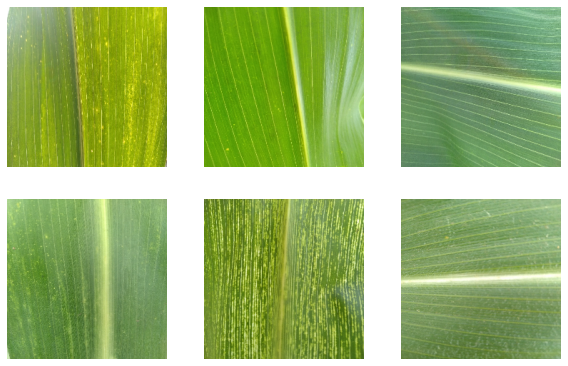

In [ ]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

for images, labels in train_ds.take(1):

  for var in range(6):

    ax = plt.subplot(3, 3, var + 1)

    plotter_lib.imshow(images[var].numpy().astype("uint8"))

    plotter_lib.axis("off")

###Import the Pre-trained Model

In [ ]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(224,224,3),

                   pooling='avg',classes=4,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

In [ ]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))

demo_resnet_model.add(Dense(4, activation='softmax'))

###Train and Evaluate Model

In [ ]:
demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
310/310 [==============================] - 100s 305ms/step - loss: 0.6637 - accuracy: 0.7758 - val_loss: 0.3059 - val_accuracy: 0.8663
Epoch 2/10
310/310 [==============================] - 90s 288ms/step - loss: 0.2854 - accuracy: 0.8833 - val_loss: 0.2882 - val_accuracy: 0.8784
Epoch 3/10
310/310 [==============================] - 91s 290ms/step - loss: 0.2550 - accuracy: 0.8962 - val_loss: 0.2889 - val_accuracy: 0.8772
Epoch 4/10
310/310 [==============================] - 91s 289ms/step - loss: 0.2248 - accuracy: 0.9072 - val_loss: 0.2639 - val_accuracy: 0.8901
Epoch 5/10
310/310 [==============================] - 92s 292ms/step - loss: 0.2039 - accuracy: 0.9131 - val_loss: 0.2543 - val_accuracy: 0.8970
Epoch 6/10
310/310 [==============================] - 92s 292ms/step - loss: 0.1912 - accuracy: 0.9217 - val_loss: 0.2712 - val_accuracy: 0.8885
Epoch 7/10
310/310 [==============================] - 92s 291ms/step - loss: 0.1813 - accuracy: 0.9261 - val_loss: 0.3090 - val_a

###Evaluate the ResNet-50 model

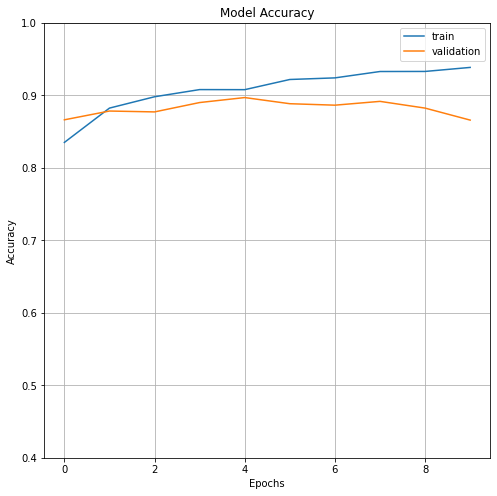

<Figure size 432x288 with 0 Axes>

In [ ]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, demo_resnet_model.history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, demo_resnet_model.history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

plotter_lib.show()

plotter_lib.savefig('output-plot.png')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
y_true = []
y_pred = []

for x, y in validation_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(demo_resnet_model.predict(x), axis=1))

target_names = ['HEATHLY','MLN_1_and_MLN_2','MSV_2','MSV_1']

print(classification_report(y_true, y_pred, target_names=target_names))


                 precision    recall  f1-score   support

        HEATHLY       0.96      1.00      0.98       610
MLN_1_and_MLN_2       0.97      0.94      0.95       612
          MSV_2       0.69      0.94      0.80       606
          MSV_1       0.93      0.60      0.73       648

       accuracy                           0.87      2476
      macro avg       0.89      0.87      0.86      2476
   weighted avg       0.89      0.87      0.86      2476



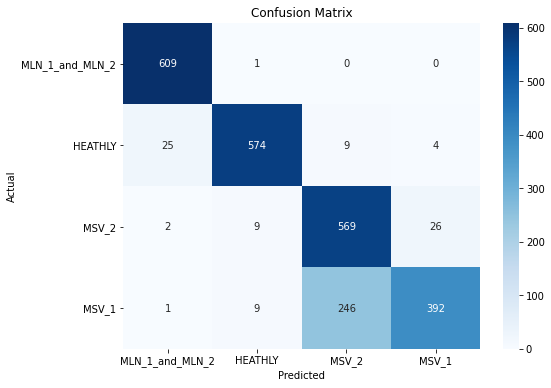

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

for x, y in validation_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(demo_resnet_model.predict(x), axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/kaggle/input/data-after-au/maizdataset_augmented/HEATHLY/Image_1.jpg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = demo_resnet_model.predict(img_array)
predicted_class = np.argmax(predictions[0])

if predicted_class==0:
    print("The model predicted that this image belogs to Healthy calass")
elif predicted_class==1:
    print("The model predicted that this image belogs to MLN_1_and_MLN_2 calass")

elif predicted_class==2:
    print("The model predicted that this image belogs to MSV_1 calass")

elif predicted_class==0:
    print("The model predicted that this image belogs to MSV_2 calass")


The model predicted that this image belogs to Healthy calass


##After Oversamplig

In [ ]:
train_path= '/kaggle/input/training-data/train'
valid_path='/kaggle/input/validation-data/validation'

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 4

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg'))
my_new_model.add(Dense(num_classes, activation='softmax'))

my_new_model.layers[0].trainable = False

my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator_with_aug = ImageDataGenerator(
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

In [ ]:
train_generator = data_generator_with_aug.flow_from_directory(
        train_path,
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical')


Found 12280 images belonging to 4 classes.


In [ ]:
data_generator_no_aug = ImageDataGenerator()

In [ ]:
validation_generator = data_generator_with_aug.flow_from_directory(valid_path,
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 3069 images belonging to 4 classes.


In [ ]:
my_new_model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10
384/384 [==============================] - 388s 1s/step - loss: 0.9239 - accuracy: 0.7090 - val_loss: 0.5243 - val_accuracy: 0.8143
Epoch 2/10
384/384 [==============================] - 281s 732ms/step - loss: 0.4750 - accuracy: 0.8340 - val_loss: 0.3504 - val_accuracy: 0.8589
Epoch 3/10
384/384 [==============================] - 279s 726ms/step - loss: 0.4166 - accuracy: 0.8489 - val_loss: 0.3496 - val_accuracy: 0.8612
Epoch 4/10
384/384 [==============================] - 280s 728ms/step - loss: 0.3944 - accuracy: 0.8592 - val_loss: 0.3320 - val_accuracy: 0.8723
Epoch 5/10
384/384 [==============================] - 281s 733ms/step - loss: 0.3762 - accuracy: 0.8632 - val_loss: 0.3350 - val_accuracy: 0.8807
Epoch 6/10
384/384 [==============================] - 285s 743ms/step - loss: 0.3637 - accuracy: 0.8682 - val_loss: 0.3092 - val_accuracy: 0.8820
Epoch 7/10
384/384 [==============================] - 285s 743ms/step - loss: 0.3570 - accuracy: 0.8676 - val_loss: 0.3421 - va

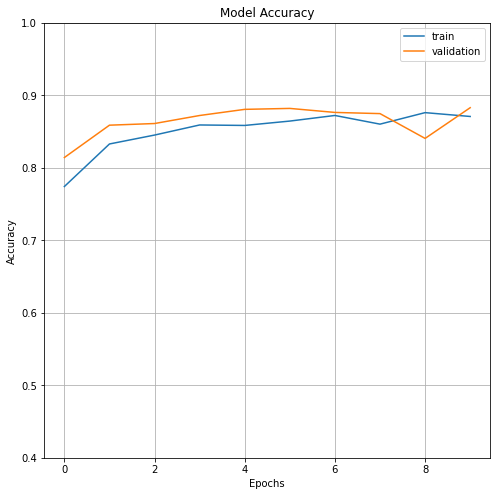

<Figure size 432x288 with 0 Axes>

In [ ]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, my_new_model.history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, my_new_model.history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])


plotter_lib.show()

plotter_lib.savefig('output-plot.png')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
y_true = []
y_pred = []

for x, y in validation_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(my_new_model.predict(x), axis=1))

target_names = ['HEATHLY','MLN_1_and_MLN_2','MSV_2','MSV_1']

print(classification_report(y_true, y_pred, target_names=target_names))


                 precision    recall  f1-score   support

        HEATHLY       0.95      1.00      0.97       610
MLN_1_and_MLN_2       0.96      0.94      0.95       612
          MSV_2       0.81      0.83      0.82       606
          MSV_1       0.85      0.81      0.83       648

       accuracy                           0.89      2476
      macro avg       0.89      0.89      0.89      2476
   weighted avg       0.89      0.89      0.89      2476



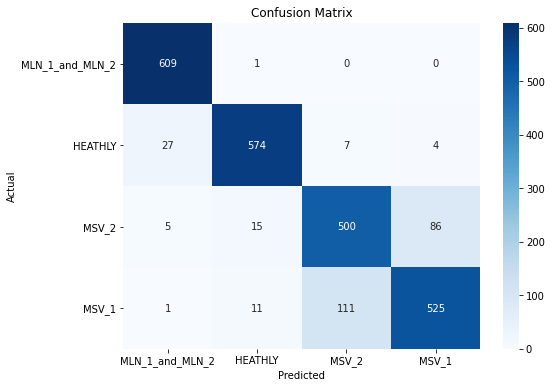

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

for x, y in validation_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(my_new_model.predict(x), axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##Comparison

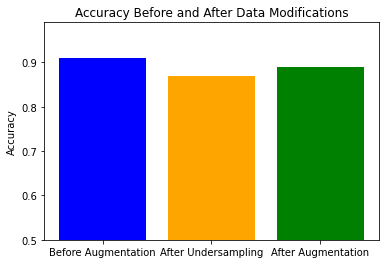

In [ ]:
import matplotlib.pyplot as plt

labels = ['Before Augmentation', 'After Undersampling', 'After Augmentation']
accuracies = [0.91, 0.87, 0.89]

fig, ax = plt.subplots()
ax.bar(labels, accuracies, color=['blue', 'orange', 'green'])

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Before and After Data Modifications')
plt.ylim(0.50, 0.99)

plt.show()

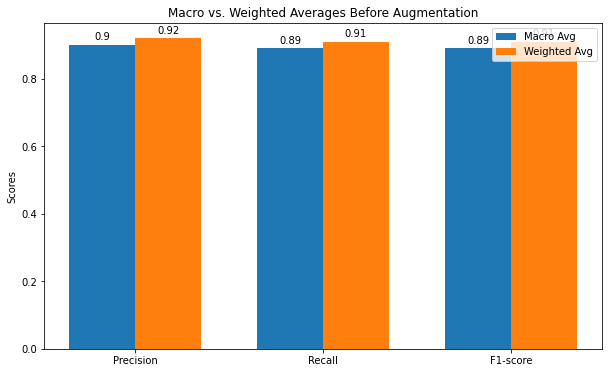

In [ ]:
import matplotlib.pyplot as plt

labels = ['Precision', 'Recall', 'F1-score']
macro_avg = {'precision': 0.90, 'recall': 0.89, 'f1-score': 0.89}
weighted_avg = {'precision': 0.92, 'recall': 0.91, 'f1-score': 0.91}

macro_scores = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score']]
weighted_scores = [weighted_avg['precision'], weighted_avg['recall'], weighted_avg['f1-score']]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, macro_scores, width, label='Macro Avg')
rects2 = ax.bar([p + width for p in x], weighted_scores, width, label='Weighted Avg')

ax.set_ylabel('Scores')
ax.set_title('Macro vs. Weighted Averages Before Augmentation')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

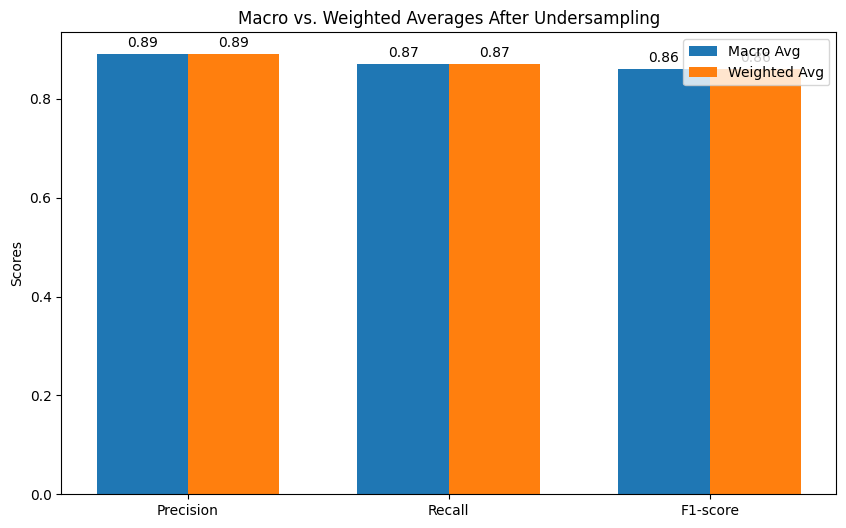

In [ ]:
import matplotlib.pyplot as plt

labels = ['Precision', 'Recall', 'F1-score']
macro_avg = {'precision': 0.89, 'recall': 0.87, 'f1-score': 0.86}
weighted_avg = {'precision': 0.89, 'recall': 0.87, 'f1-score': 0.86}

macro_scores = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score']]
weighted_scores = [weighted_avg['precision'], weighted_avg['recall'], weighted_avg['f1-score']]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, macro_scores, width, label='Macro Avg')
rects2 = ax.bar([p + width for p in x], weighted_scores, width, label='Weighted Avg')

ax.set_ylabel('Scores')
ax.set_title('Macro vs. Weighted Averages After Undersampling')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

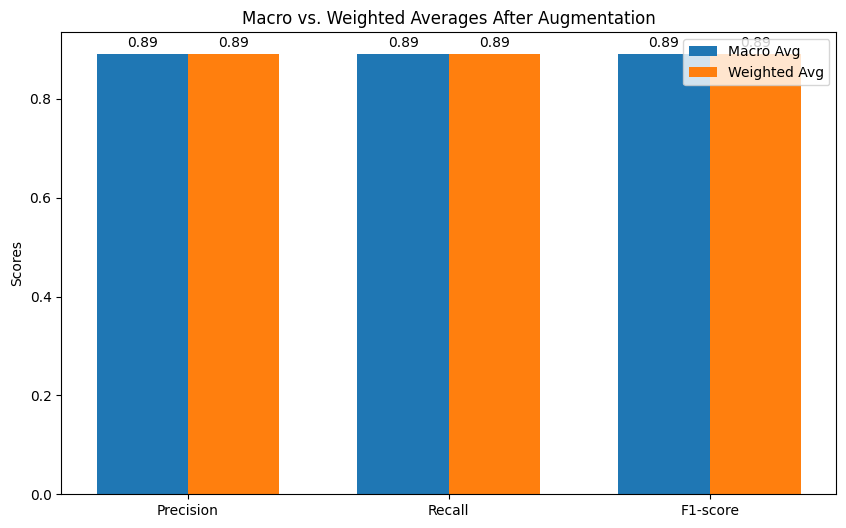

In [ ]:
import matplotlib.pyplot as plt

labels = ['Precision', 'Recall', 'F1-score']
macro_avg = {'precision': 0.89, 'recall': 0.89, 'f1-score': 0.89}
weighted_avg = {'precision': 0.89, 'recall': 0.89, 'f1-score': 0.89}

macro_scores = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score']]
weighted_scores = [weighted_avg['precision'], weighted_avg['recall'], weighted_avg['f1-score']]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, macro_scores, width, label='Macro Avg')
rects2 = ax.bar([p + width for p in x], weighted_scores, width, label='Weighted Avg')

ax.set_ylabel('Scores')
ax.set_title('Macro vs. Weighted Averages After Augmentation')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

Thank YOU!